In [3]:
%matplotlib inline

In [6]:
#!pip install librosa soundfile

In [7]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import librosa.display
import IPython.display
import soundfile as sf

In [8]:
files = glob.glob('UrbanSound8K/audio/fold1/*')

In [9]:
len(files)

873

In [10]:
class_map = {'0' : 'air_conditioner', '1' : 'car_horn', '2' : 'children_playing', '3' : 'dog_bark', '4' : 'drilling', 
                 '5' : 'engine_idling', '6' : 'gun_shot', '7' : 'jackhammer', '8' : 'siren', '9' : 'street_music'}
pd.DataFrame(sorted(list(class_map.items())))

,0,1
0,0,air_conditioner
1,1,car_horn
2,2,children_playing
3,3,dog_bark
4,4,drilling
5,5,engine_idling
6,6,gun_shot
7,7,jackhammer
8,8,siren
9,9,street_music


In [11]:
samples = [(class_map[label], [f for f in files if f.split('-')[1] == label][0]) 
           for label in class_map.keys()]

In [12]:
samples

[('air_conditioner', 'UrbanSound8K/audio/fold1/57320-0-0-4.wav'),
 ('car_horn', 'UrbanSound8K/audio/fold1/24074-1-0-2.wav'),
 ('children_playing', 'UrbanSound8K/audio/fold1/138031-2-0-2.wav'),
 ('dog_bark', 'UrbanSound8K/audio/fold1/57553-3-2-0.wav'),
 ('drilling', 'UrbanSound8K/audio/fold1/46669-4-0-26.wav'),
 ('engine_idling', 'UrbanSound8K/audio/fold1/176787-5-0-17.wav'),
 ('gun_shot', 'UrbanSound8K/audio/fold1/102305-6-0-0.wav'),
 ('jackhammer', 'UrbanSound8K/audio/fold1/180937-7-4-4.wav'),
 ('siren', 'UrbanSound8K/audio/fold1/40722-8-0-2.wav'),
 ('street_music', 'UrbanSound8K/audio/fold1/172314-9-0-51.wav')]

In [13]:
def get_sound_data(path, sr=22050):
    data, fsr = sf.read(path)
    data_22k = librosa.resample(data.T, fsr, sr)
    if len(data_22k.shape) > 1:
        data_22k = np.average(data_22k, axis=0)
    return data_22k, sr

In [14]:
sample_data = [(sample[0], get_sound_data(sample[1])) for sample in samples]

In [15]:
[(sample[0], sample[1][0].shape) for sample in sample_data]

[('air_conditioner', (88200,)),
 ('car_horn', (88200,)),
 ('children_playing', (88200,)),
 ('dog_bark', (26811,)),
 ('drilling', (88200,)),
 ('engine_idling', (88200,)),
 ('gun_shot', (57551,)),
 ('jackhammer', (88200,)),
 ('siren', (88200,)),
 ('street_music', (88200,))]

In [16]:
for data in sample_data:
    print(data[0], ':')
    IPython.display.display(IPython.display.Audio(data=data[1][0], rate=data[1][1]))

air_conditioner :


car_horn :


children_playing :


dog_bark :


drilling :


engine_idling :


gun_shot :


jackhammer :


siren :


street_music :


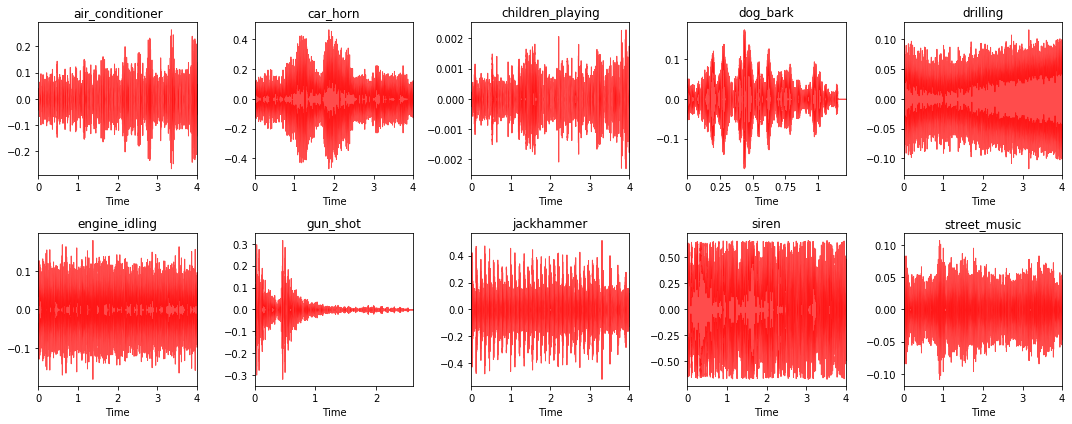

In [17]:
i = 1
fig = plt.figure(figsize=(15, 6))
for item in sample_data:
    plt.subplot(2, 5, i)
    librosa.display.waveplot(item[1][0], sr=item[1][1], color='r', alpha=0.7)
    plt.title(item[0])
    i += 1
plt.tight_layout()

/home/dyanos/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:7609: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


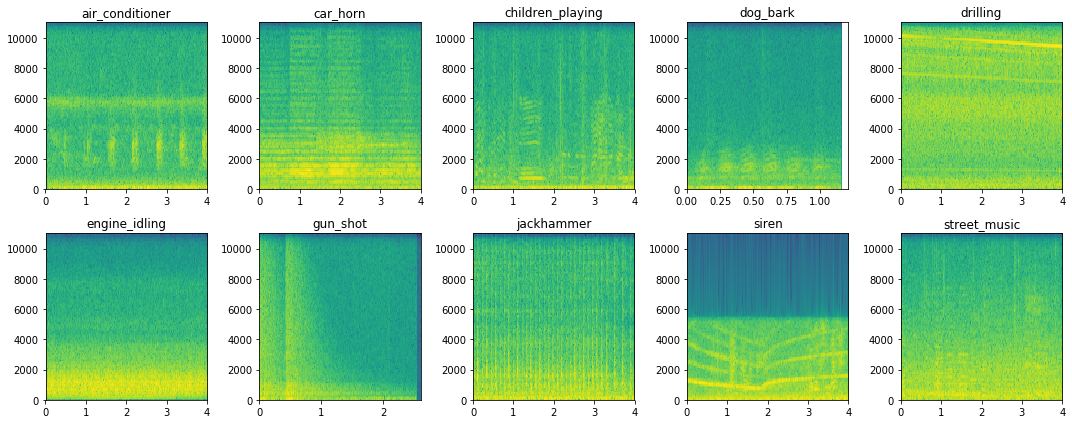

In [18]:
i = 1
fig = plt.figure(figsize=(15, 6))
for item in sample_data:
    plt.subplot(2, 5, i)
    specgram(item[1][0], Fs=item[1][1])
    plt.title(item[0])
    i += 1
plt.tight_layout()

In [22]:
import librosa.core

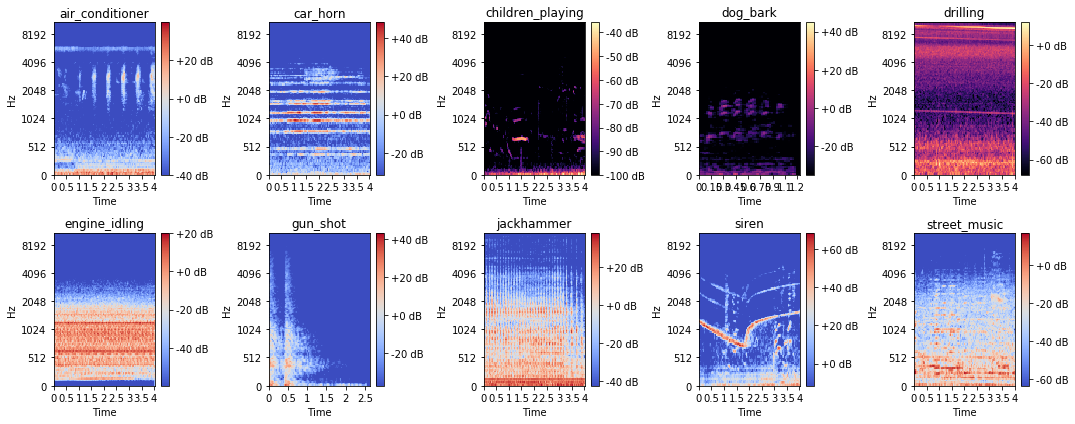

In [24]:
i = 1
fig = plt.figure(figsize=(15, 6))
for item in sample_data:
    plt.subplot(2, 5, i)
    S = librosa.feature.melspectrogram(item[1][0], sr=item[1][1], n_mels=128)
    log_S = librosa.amplitude_to_db(S)
    librosa.display.specshow(log_S, sr=item[1][1], x_axis='time', y_axis='mel')
    plt.title(item[0])
    plt.colorbar(format='%+02.0f dB')
    i += 1
plt.tight_layout()

In [25]:
y = sample_data[6][1][0]

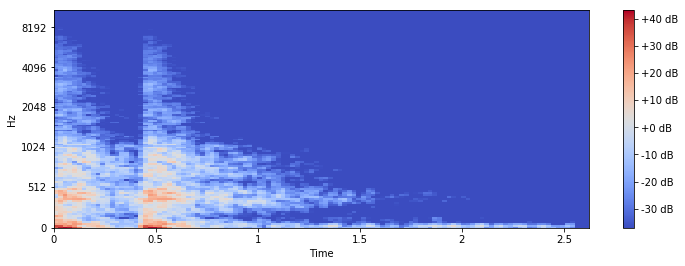

In [26]:
S = librosa.feature.melspectrogram(y, sr=22050, n_mels=128)
log_S = librosa.amplitude_to_db(S)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=22050, x_axis='time', y_axis='mel')
plt.colorbar(format='%+02.0f dB')

In [27]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

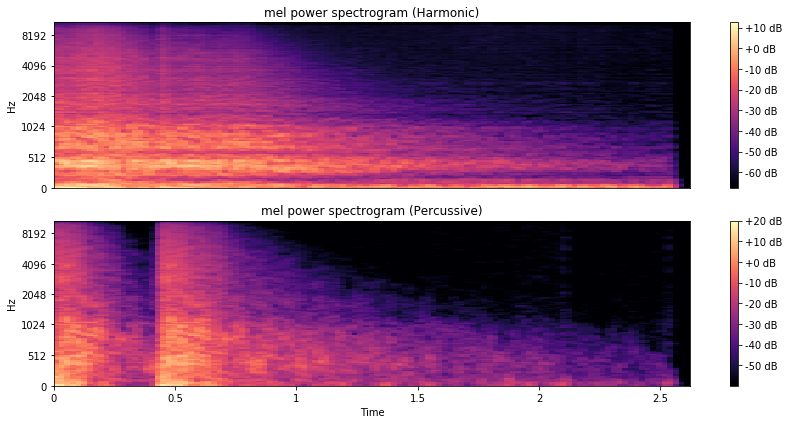

In [29]:
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=22050, n_mels=128)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=22050)
log_Sh = librosa.power_to_db(S_harmonic)
log_Sp = librosa.power_to_db(S_percussive)

sr = 22050 # sr변수 추가

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')
plt.title('mel power spectrogram (Harmonic)')
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram (Percussive)')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

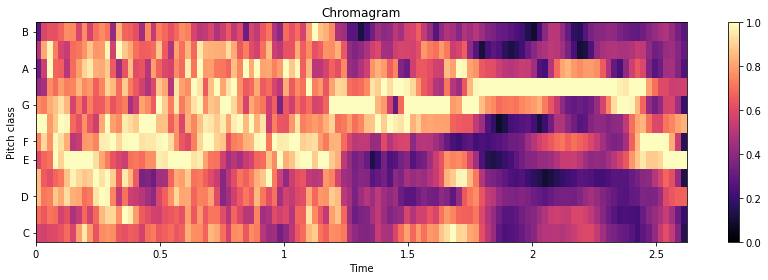

In [30]:
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Make a new figure
plt.figure(figsize=(12, 4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()